# DATA PREPROCESSING

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df=pd.read_csv('cars.csv')

In [50]:
df

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Mercedes,C-Class,2019,22000,Diesel,Automatic,First,16,1950,191,5,2900000
96,97,Toyota,Innova Crysta,2017,38000,Diesel,Manual,Second,13,2755,171,7,1400000
97,98,Ford,EcoSport,2018,26000,Petrol,Manual,Third,18,1497,121,5,750000
98,99,Hyundai,Verna,2019,24000,Petrol,Automatic,Second,17,1497,113,5,850000


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [52]:
df.shape

(100, 13)

In [53]:
df.isnull().sum()

Car_ID               0
Brand                0
Model                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

# Visualization

C:\Users\smits\AppData\Local\Temp\ipykernel_22864\1726153885.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Brand',y='Price',data=avg_price_per_brand,palette='viridis')


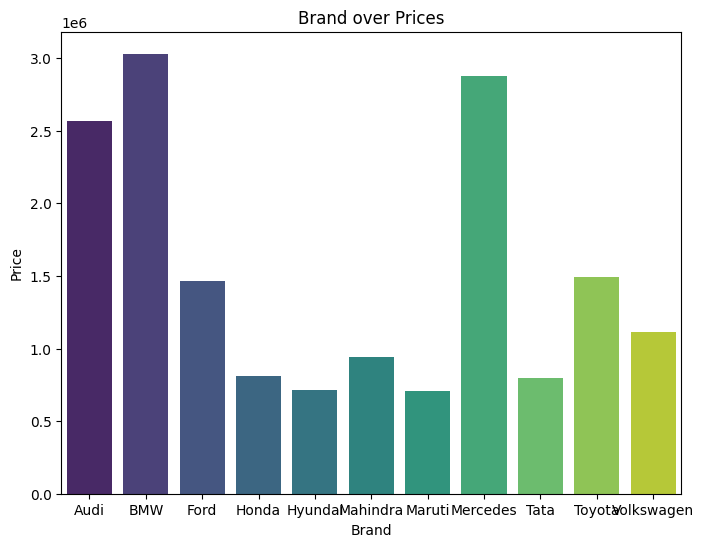

In [54]:
avg_price_per_brand=df.groupby('Brand')['Price'].mean().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(x='Brand',y='Price',data=avg_price_per_brand,palette='viridis')
plt.title("Brand over Prices")
plt.xlabel('Brand')
plt.ylabel('Price')
plt.show()

C:\Users\smits\AppData\Local\Temp\ipykernel_22864\1112138292.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Brand',y='Price',data=df,palette='viridis')


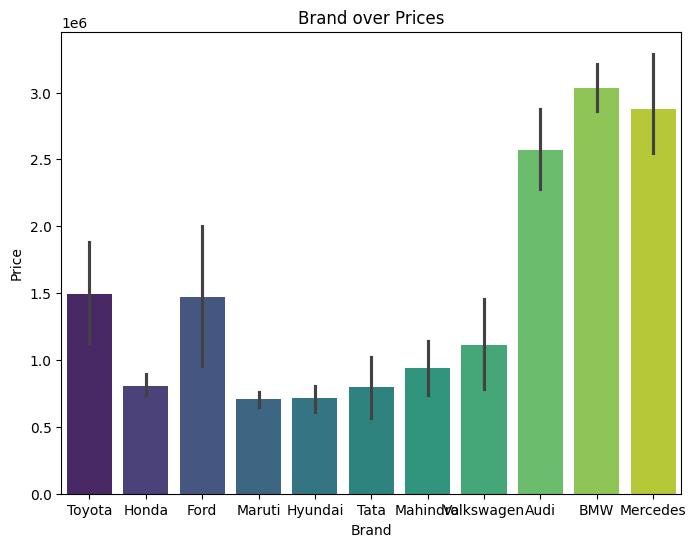

In [55]:
plt.figure(figsize=(8,6))
sns.barplot(x='Brand',y='Price',data=df,palette='viridis')
plt.title("Brand over Prices")
plt.xlabel('Brand')
plt.ylabel('Price')
plt.show()

C:\Users\smits\AppData\Local\Temp\ipykernel_22864\3326121538.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Fuel_Type',y='Price',data=df,palette='viridis')


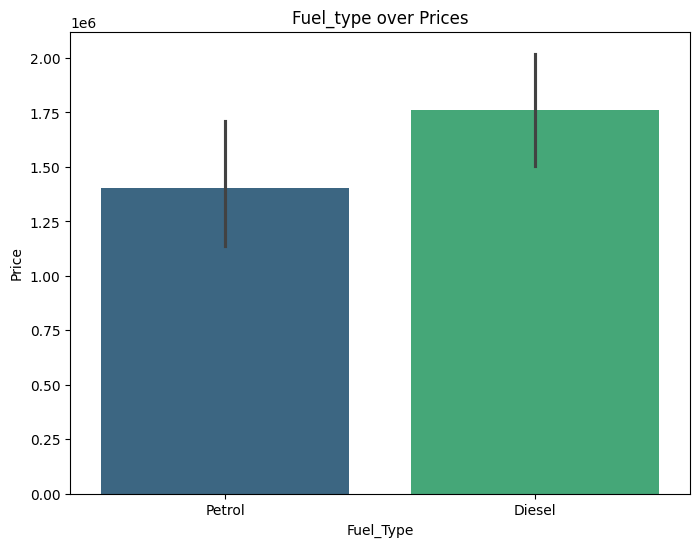

In [56]:
plt.figure(figsize=(8,6))
sns.barplot(x='Fuel_Type',y='Price',data=df,palette='viridis')
plt.title("Fuel_type over Prices")
plt.xlabel('Fuel_Type')
plt.ylabel('Price')
plt.show()

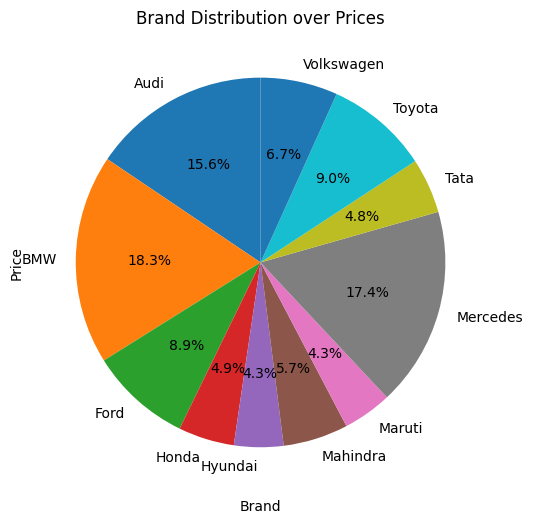

In [57]:
brand_price_data = df.groupby('Brand')['Price'].mean()

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(brand_price_data, labels=brand_price_data.index, autopct='%1.1f%%', startangle=90)
plt.title("Brand Distribution over Prices")
plt.xlabel('Brand')
plt.ylabel('Price')
plt.show()

# Encoding

In [58]:
df_encoded = pd.get_dummies(df, columns=['Brand','Model','Owner_Type','Fuel_Type', 'Transmission'], drop_first=True)

df_encoded = df_encoded.astype(int)

In [59]:
df_encoded.head()

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Brand_BMW,Brand_Ford,...,Model_WR-V,Model_X1,Model_X3,Model_X5,Model_XUV300,Model_Yaris,Owner_Type_Second,Owner_Type_Third,Fuel_Type_Petrol,Transmission_Manual
0,1,2018,50000,15,1498,108,5,800000,0,0,...,0,0,0,0,0,0,0,0,1,1
1,2,2019,40000,17,1597,140,5,1000000,0,0,...,0,0,0,0,0,0,1,0,1,0
2,3,2017,20000,10,4951,395,4,2500000,0,1,...,0,0,0,0,0,0,0,0,1,0
3,4,2020,30000,23,1248,74,5,600000,0,0,...,0,0,0,0,0,0,0,1,0,1
4,5,2016,60000,18,1999,194,5,850000,0,0,...,0,0,0,0,0,0,1,0,0,0


# Feature Scaling 

In [63]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
df_scaled=df_encoded.copy()
df_scaled[['Kilometers_Driven','Mileage','Engine','Power','Seats','Price']]=scaler.fit_transform(df[['Kilometers_Driven','Mileage','Engine','Power','Seats','Price']])

df_scaled.head()

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Brand_BMW,Brand_Ford,...,Model_WR-V,Model_X1,Model_X3,Model_X5,Model_XUV300,Model_Yaris,Owner_Type_Second,Owner_Type_Third,Fuel_Type_Petrol,Transmission_Manual
0,1,2018,2.407540,-0.671057,-0.568704,-0.654590,-0.308149,-0.777693,0,0,...,0,0,0,0,0,0,0,0,1,1
1,2,2019,1.305691,-0.063766,-0.411098,-0.236739,-0.308149,-0.576739,0,0,...,0,0,0,0,0,0,1,0,1,0
2,3,2017,-0.898007,-2.189286,4.928417,3.093011,-1.647929,0.930419,0,1,...,0,0,0,0,0,0,0,0,1,0
3,4,2020,0.203842,1.758109,-0.966700,-1.098556,-0.308149,-0.978648,0,0,...,0,0,0,0,0,0,0,1,0,1
4,5,2016,3.509389,0.239880,0.228880,0.468385,-0.308149,-0.727455,0,0,...,0,0,0,0,0,0,1,0,0,0


# Simple Model 

In [65]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming df_scaled is already loaded and scaled
# Separating features and target
X = df_scaled[['Car_ID', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Fuel_Type_Petrol', 'Transmission_Manual']]
y = df_scaled['Price']

# Identifying categorical and numerical columns
categorical_columns = [ 'Fuel_Type_Petrol', 'Transmission_Manual']
numerical_columns = ['Car_ID', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']

# Preprocessing pipelines
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))     # Encode categorical variables
])

# Column transformer to apply transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_columns),
        ('cat', categorical_pipeline, categorical_columns)
    ]
)

# Final pipeline with preprocessor and model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R2 Score:", r2)


MSE: 0.2361550269612469
MAE: 0.35861057706349725
R2 Score: 0.7139851783019355


In [66]:
X_train

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Petrol,Transmission_Manual
55,56,2018,-0.016528,-0.063766,0.179528,0.376980,-0.308149,0,0
88,89,2019,-0.677637,-1.278349,0.645979,3.106069,-1.647929,1,0
26,27,2018,-0.016528,-0.671057,0.205000,1.082103,-0.308149,1,0
42,43,2018,1.526061,2.061755,-1.286689,-1.163846,-0.308149,0,1
69,70,2017,0.424212,1.454463,-0.434978,-0.419548,-0.308149,0,0
...,...,...,...,...,...,...,...,...,...
60,61,2019,-0.457267,-0.063766,-0.570296,-0.589300,-0.308149,1,0
71,72,2019,-0.457267,-0.063766,-0.626016,-0.719879,-0.308149,1,1
14,15,2020,-1.118377,0.543526,-0.626016,-0.719879,2.371410,1,1
92,93,2017,0.424212,0.239880,-0.409506,-0.719879,-0.308149,1,1
